###Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the dataset

In [ ]:
from os import path
class Get_Dataset():
  '''Loads the dataset based on the given path'''
  def __init__(self, path):
    self.path = path

  def load_dataset(self):
    return pd.read_csv(self.path)

In [ ]:
#creating an object from get_dataset() class.
get = Get_Dataset('/content/Daily_Water_Intake.csv')
dataset = get.load_dataset()

In [ ]:
dataset.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


In [ ]:
dataset.tail()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
29995,47,Male,97,3.45,Moderate,Cold,Good
29996,49,Female,109,5.32,High,Hot,Good
29997,56,Female,54,1.50,Moderate,Cold,Poor
29998,36,Male,106,4.00,Low,Hot,Good
29999,26,Female,98,4.43,Moderate,Hot,Good


###EDA

In [ ]:
class Exploratory_Data_Analysis():
  '''Performs EDA on the dataset like shape, describe, isnull, duplicates, object type, removes dupilicates, getting num_cols and cat_cols'''
  def __init__(self, dataset):
    self.dataset = dataset

  def basic_eda(self):
    eda = {}
    eda['shape'] = self.dataset.shape
    eda['describe'] = self.dataset.describe()
    eda['isnull\n'] = self.dataset.isnull().sum()
    eda['duplicates'] = self.dataset.duplicated().sum()
    eda['object type\n'] = self.dataset.dtypes
    return eda

  def remove_duplicates(self):
    original_duplicates = self.dataset.duplicated().sum()
    remove_dups = self.dataset.drop_duplicates()
    final_duplicates = remove_dups.duplicated().sum()
    print(f'Original Duplicates: {original_duplicates}')
    print(f'Final Duplicates: {final_duplicates}')
    return remove_dups

  def numeric_columns(self):
    '''Gets all the numeric columns in the dataset'''
    numeric_column = self.dataset.select_dtypes(include='number').columns
    return numeric_column

  def numeric_feature_distribution(self):
    '''Plots the distribution of all the numeric columns in the dataset'''
    # Call numeric_columns() as an instance method
    num_cols = self.numeric_columns()
    for i in num_cols:
      plt.figure(figsize=(10,5))
      sns.distplot(self.dataset[i])
      plt.title(f'Distribution of {i}')
      plt.show()

  def numeric_correlation(self):
    '''shows the correlation between numeric columns'''
    num_cols = self.numeric_columns()
    plt.figure(figsize=(7,7))
    #access the corr from the dataframe which is dataset.
    corr = sns.heatmap(dataset[num_cols].corr(), annot=True)
    plt.title('Numeric correlation')
    plt.show()

  def categorical_columns(self):
    '''Gets all the categorical columns in the dataset'''
    cat_col = self.dataset.select_dtypes(include='object').columns
    return cat_col

  def categorical_countplot(self):
    '''Tells the categorical countplot for all the categorical columns'''
    categorical_columns = self.categorical_columns()
    for col in categorical_columns:
      plt.figure(figsize=(7,7))
      sns.countplot(dataset[col])
      plt.title(f'Countplot for {col}')
      plt.show()

  def detect_outlayers(self):
    '''Detects the outllayers in the dataset'''
    test_dataset = self.dataset
    for i in test_dataset:
      plt.figure(figsize=(7,7))
      sns.boxplot(test_dataset[i])
      plt.title(f'Boxplot for {i}')
      plt.show()


In [ ]:
#Creating an object from Exploratory_Data_Analysis() class.
EDA = Exploratory_Data_Analysis(dataset)

In [ ]:
results = EDA.basic_eda()
for i in results:
  print(i, results[i])
  print('-'*100)

shape (30000, 7)
----------------------------------------------------------------------------------------------------
describe                 Age  Weight (kg)  Daily Water Intake (liters)
count  30000.000000  30000.00000                 30000.000000
mean      43.467667     76.84860                     2.852444
std       14.998940     18.74494                     0.835537
min       18.000000     45.00000                     1.500000
25%       30.000000     61.00000                     2.220000
50%       43.000000     77.00000                     2.830000
75%       56.000000     93.00000                     3.440000
max       69.000000    109.00000                     5.430000
----------------------------------------------------------------------------------------------------
isnull
 Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydratio

In [ ]:
removed_dups = EDA.remove_duplicates()

Original Duplicates: 338
Final Duplicates: 0


In [ ]:
extracted_numeric_columns = EDA.numeric_columns()
print("Numeric columns:\n")
for i in extracted_numeric_columns:
  print(i)

Numeric columns:

Age
Weight (kg)
Daily Water Intake (liters)


In [ ]:
cat_cols = EDA.categorical_columns()
print("Categorical columns:\n")
for i in cat_cols:
  print(i)

Categorical columns:

Gender
Physical Activity Level
Weather
Hydration Level


/tmp/ipython-input-656402814.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.dataset[i])


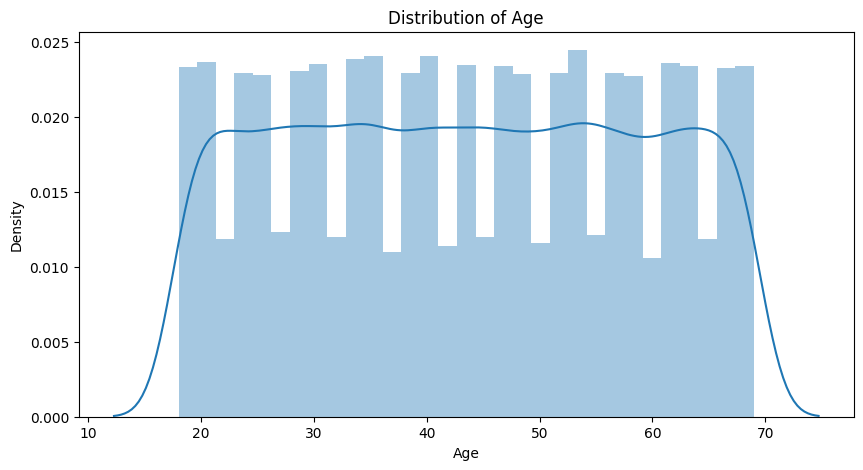

/tmp/ipython-input-656402814.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.dataset[i])


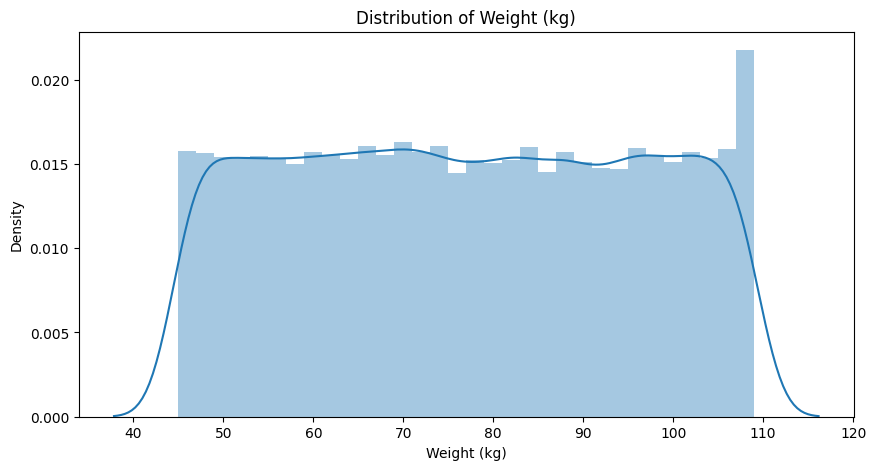

/tmp/ipython-input-656402814.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.dataset[i])


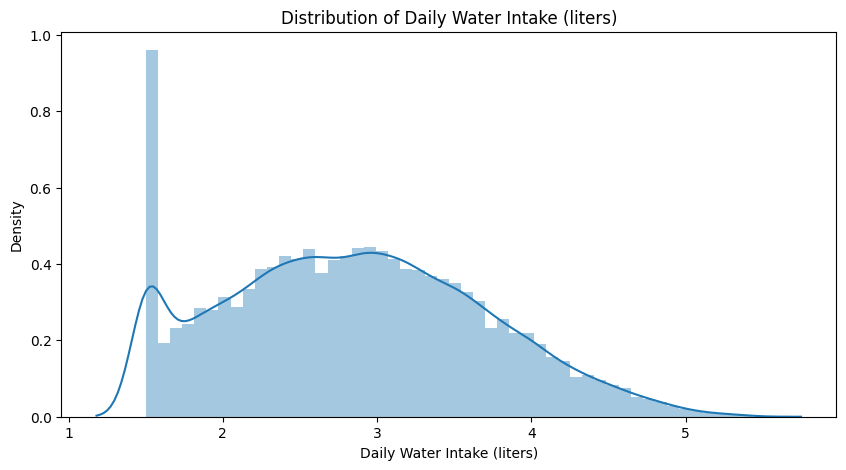

In [ ]:
distribution = EDA.numeric_feature_distribution()

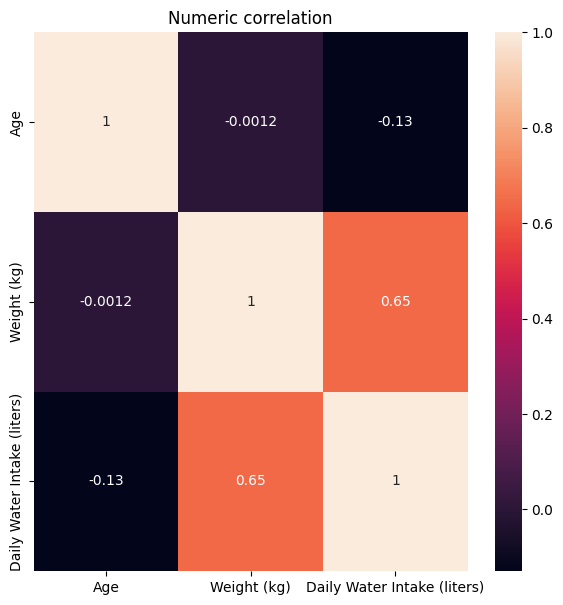

In [ ]:
num_corr = EDA.numeric_correlation()

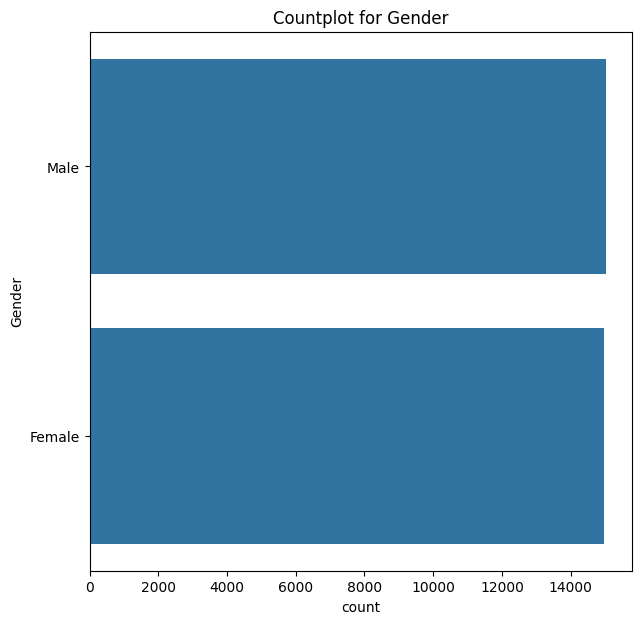

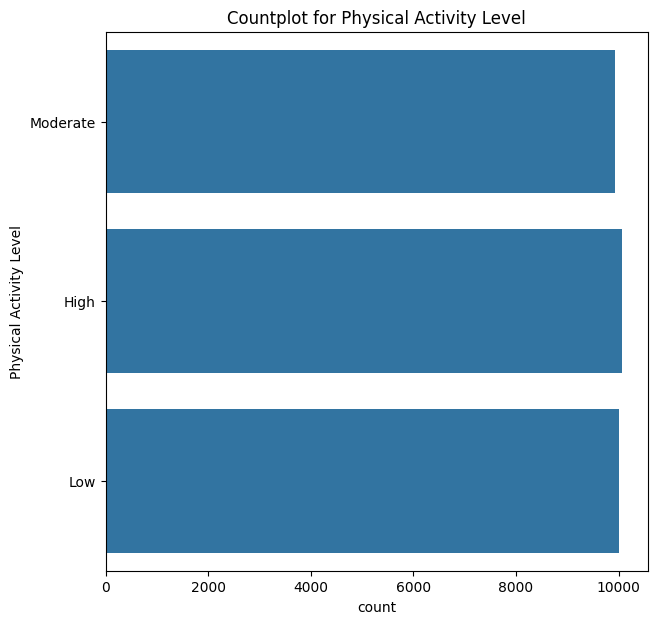

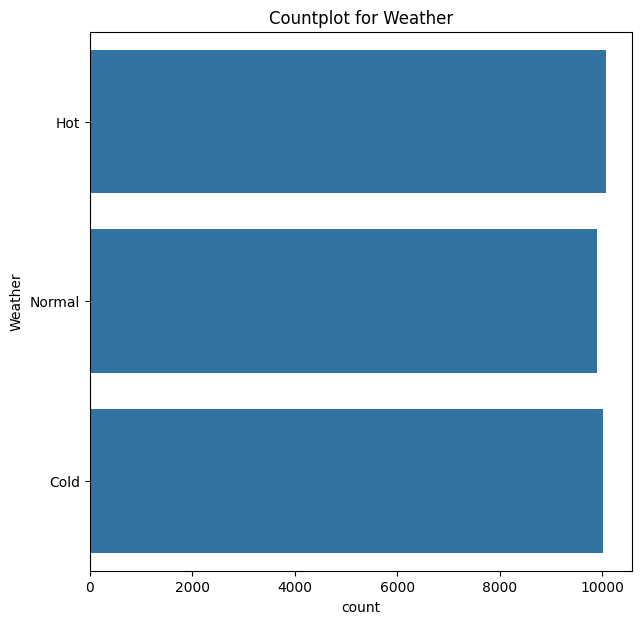

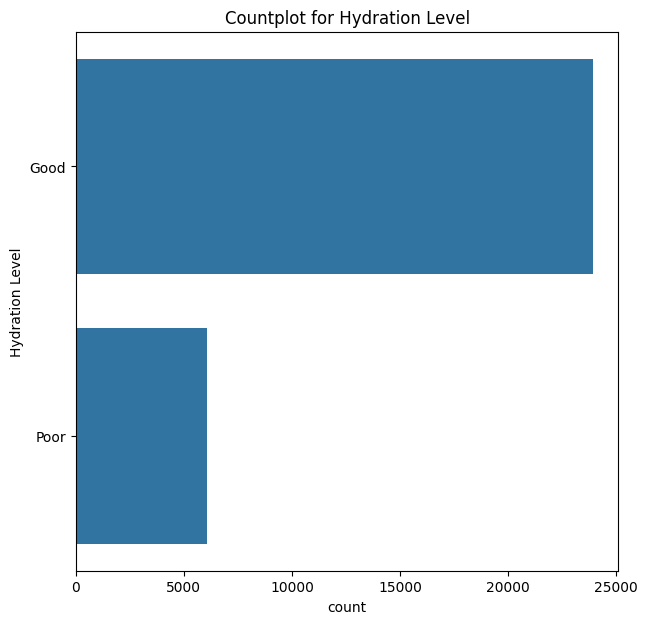

In [ ]:
cat_countplot = EDA.categorical_countplot()

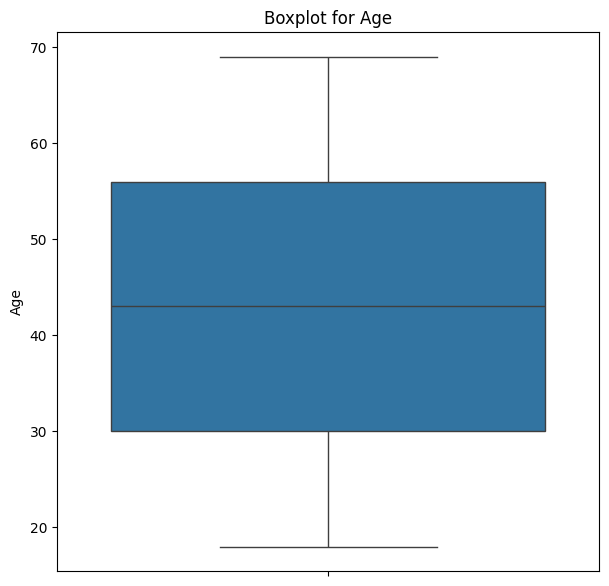

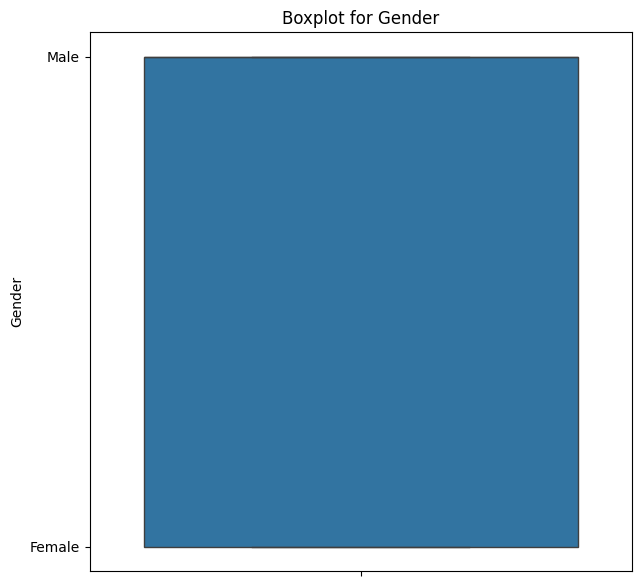

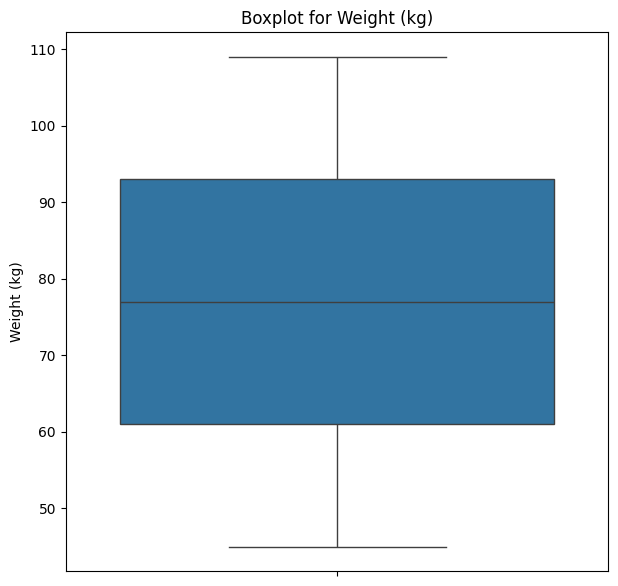

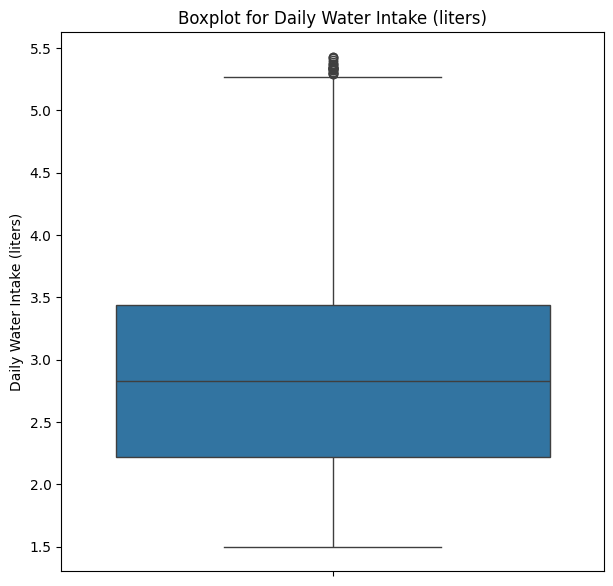

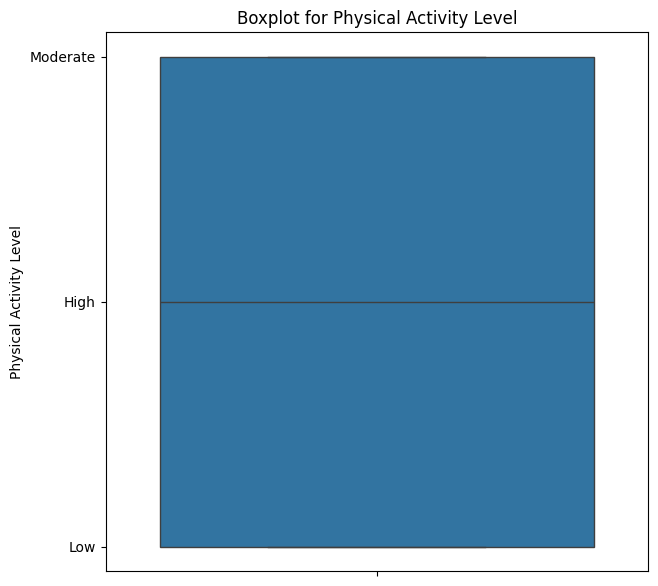

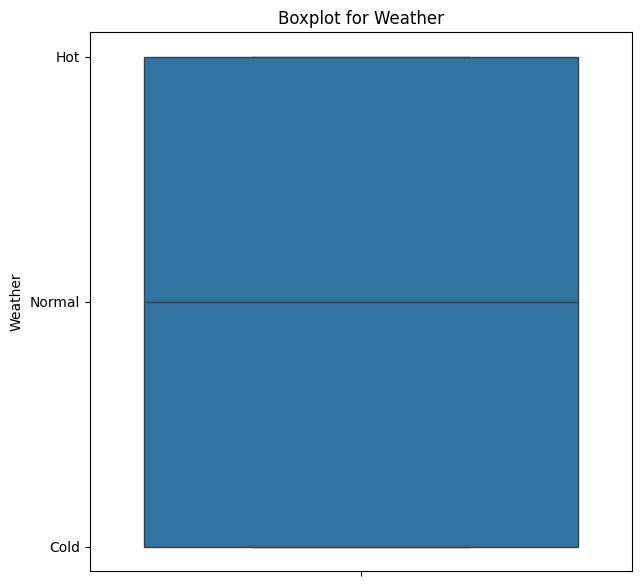

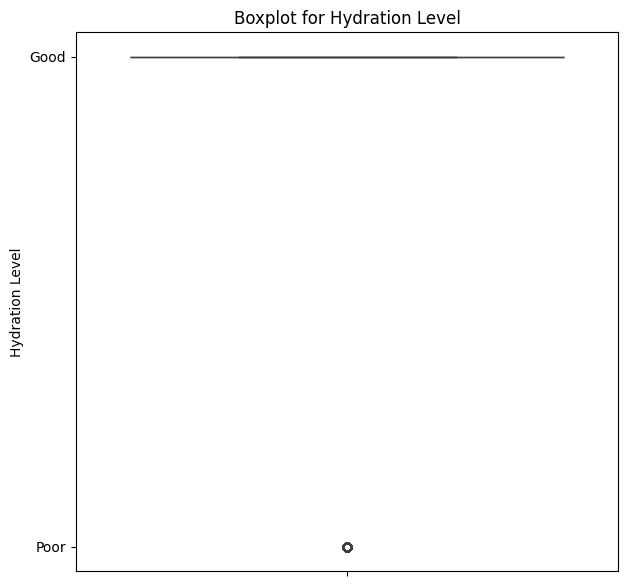

In [ ]:
outlayers = EDA.detect_outlayers()

###Pre-processing

In [ ]:
class Pre_Processing():
  '''Done some pre-processing like features and target, check balance of dataset, split, encode, scale'''
  def __init__(self, dataset):
    self.dataset = dataset

  def get_features_and_target(self):
    '''gets the feature(x) and target(y) from the dataset'''
    self.x = self.dataset.drop('Hydration Level', axis=1)
    self.y = self.dataset['Hydration Level']
    return self.x, self.y

  def check_balance_of_dataset(self):
    '''Checks the balance of the dataset'''
    y = self.y
    plt.figure(figsize=(7,7))
    sns.countplot(y)
    plt.title('Dataset balance check')
    plt.show()
    count = y.value_counts()
    print(count)
    ratio = count.max()/count.min()
    print(f'Ratio is: {ratio}')
    if ratio <= 1.5:
      print('Dataset is balanced')
    elif ratio <=3:
      print('Dataset is not balanced')
    else:
      print('Dataset is highly imbalanced')

  def split_dataset(self):
    '''Splits the dataset into train and test'''
    from sklearn.model_selection import train_test_split
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=42)
    return self.x_train, self.x_test, self.y_train, self.y_test

  def encode_dataset(self, x_train, x_test):
    '''Encodes the categorical columns in the dataset'''
    from sklearn.preprocessing import LabelEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    label_cols = []
    onehot_cols = []
    instance = Exploratory_Data_Analysis(self.x_train)
    cate_cols = instance.categorical_columns()
    for i in cate_cols:
      if i != 'Hydration Level':
        if self.x_train[i].nunique() ==2:
          label_cols.append(i)
        else:
          onehot_cols.append(i)
    print(f'Label columns: {label_cols}')
    print(f'Onehot columns: {onehot_cols}')
    for col in label_cols:
      le = LabelEncoder()
      x_train[col] = le.fit_transform(x_train[col])
      x_test[col] = le.transform(x_test[col])
      print("Label encode done!")
    if onehot_cols:
      ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), onehot_cols)], remainder='passthrough')
      x_train = ct.fit_transform(x_train)
      x_test = ct.transform(x_test)
      print("Onehot encode done!")
    return x_train, x_test

  def balancing_dataset(self, x, y):
    '''Balances the dataset'''
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)
    return x_resampled, y_resampled

  def scale_dataset(self, x_train, x_test):
    '''Scales the dataset'''
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test

In [ ]:
#Creating an object from Pre_Processing() class.
Pre_process = Pre_Processing(dataset)

In [ ]:
x,y = Pre_process.get_features_and_target()

In [ ]:
x

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather
0,56,Male,96,4.23,Moderate,Hot
1,60,Male,105,3.95,High,Normal
2,36,Male,68,2.39,Moderate,Cold
3,19,Female,74,3.13,Moderate,Hot
4,38,Male,77,2.11,Low,Normal
...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold
29996,49,Female,109,5.32,High,Hot
29997,56,Female,54,1.50,Moderate,Cold
29998,36,Male,106,4.00,Low,Hot


In [ ]:
y

,Hydration Level
0,Good
1,Good
2,Good
3,Good
4,Poor
...,...
29995,Good
29996,Good
29997,Poor
29998,Good


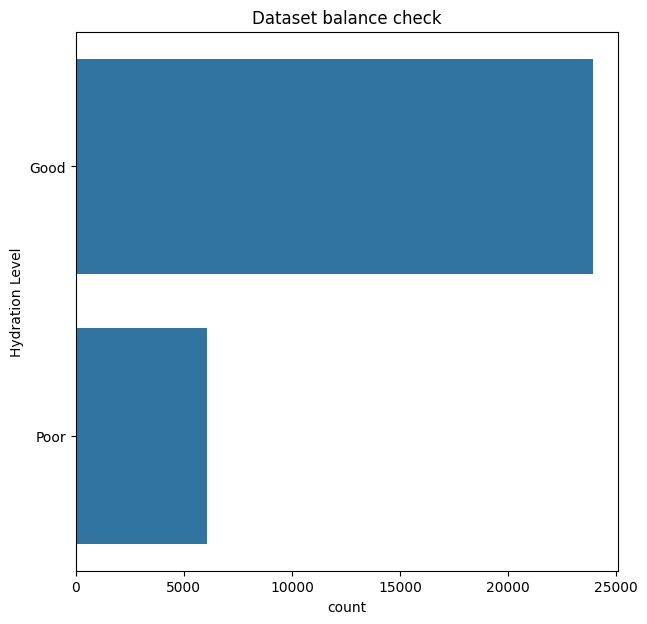

Hydration Level
Good    23915
Poor     6085
Name: count, dtype: int64
Ratio is: 3.930156121610518
Dataset is highly imbalanced


In [ ]:
check_balance = Pre_process.check_balance_of_dataset()

In [ ]:
x_train, x_test, y_train, y_test = Pre_process.split_dataset()

In [ ]:
x_train

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather
21753,55,Female,90,2.87,Moderate,Cold
251,20,Female,62,1.50,Low,Cold
22941,22,Female,87,3.43,High,Normal
618,56,Male,62,3.03,Moderate,Hot
17090,32,Female,83,3.54,High,Cold
...,...,...,...,...,...,...
29802,24,Female,51,2.06,Moderate,Normal
5390,62,Male,93,2.96,Moderate,Normal
860,40,Male,103,3.70,High,Normal
15795,24,Female,74,3.91,High,Hot


In [ ]:
x_test

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather
2308,57,Male,70,2.48,Moderate,Cold
22404,39,Male,95,3.93,Moderate,Hot
23397,18,Female,54,2.36,Moderate,Normal
25058,57,Female,61,1.50,Low,Cold
2664,45,Male,81,3.40,Low,Hot
...,...,...,...,...,...,...
2210,40,Male,103,3.05,Low,Normal
14144,35,Male,93,4.05,High,Hot
23108,48,Male,53,1.50,Low,Cold
25703,53,Male,55,1.50,Moderate,Cold


In [ ]:
y_train

,Hydration Level
21753,Good
251,Poor
22941,Good
618,Good
17090,Good
...,...
29802,Good
5390,Good
860,Good
15795,Good


In [ ]:
y_test

,Hydration Level
2308,Good
22404,Good
23397,Good
25058,Poor
2664,Good
...,...
2210,Poor
14144,Good
23108,Poor
25703,Poor


In [ ]:
x_train, x_test = Pre_process.encode_dataset(x_train, x_test)

Label columns: ['Gender']
Onehot columns: ['Physical Activity Level', 'Weather']
Label encode done!
Onehot encode done!


In [ ]:
x_train

array([[  0.  ,   0.  ,   1.  , ...,   0.  ,  90.  ,   2.87],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,  62.  ,   1.5 ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  87.  ,   3.43],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   1.  , 103.  ,   3.7 ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  74.  ,   3.91],
       [  0.  ,   0.  ,   1.  , ...,   0.  ,  70.  ,   2.87]])

In [ ]:
x_test

array([[ 0.  ,  0.  ,  1.  , ...,  1.  , 70.  ,  2.48],
       [ 0.  ,  0.  ,  1.  , ...,  1.  , 95.  ,  3.93],
       [ 0.  ,  0.  ,  1.  , ...,  0.  , 54.  ,  2.36],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  1.  , 53.  ,  1.5 ],
       [ 0.  ,  0.  ,  1.  , ...,  1.  , 55.  ,  1.5 ],
       [ 1.  ,  0.  ,  0.  , ...,  1.  , 83.  ,  4.02]])

In [ ]:
balanced_x, balanced_y = Pre_process.balancing_dataset(x_train, y_train)

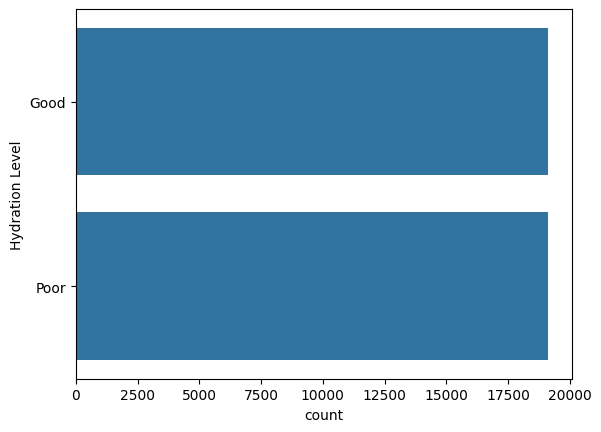

In [ ]:
sns.countplot(balanced_y)
plt.show()

In [ ]:
x_train, x_test = Pre_process.scale_dataset(balanced_x, x_test)

In [ ]:
x_train

array([[-0.5268403 , -0.95360297,  1.50428706, ..., -0.99926832,
         0.65643366,  0.36448515],
       [-0.5268403 ,  1.04865445, -0.66476674, ..., -0.99926832,
        -0.8827017 , -1.31710126],
       [ 1.89810841, -0.95360297, -0.66476674, ..., -0.99926832,
         0.4915263 ,  1.05184894],
       ...,
       [-0.5268403 ,  1.04865445, -0.66476674, ...,  1.00073222,
        -0.44294874, -1.31710126],
       [-0.5268403 ,  1.04865445, -0.66476674, ...,  1.00073222,
        -1.32245466, -1.18208338],
       [-0.5268403 ,  1.04865445, -0.66476674, ..., -0.99926832,
         0.93127926,  0.1680955 ]])

In [ ]:
x_test

array([[-0.5268403 , -0.95360297,  1.50428706, ...,  1.00073222,
        -0.44294874, -0.11421463],
       [-0.5268403 , -0.95360297,  1.50428706, ...,  1.00073222,
         0.93127926,  1.66556661],
       [-0.5268403 , -0.95360297,  1.50428706, ..., -0.99926832,
        -1.32245466, -0.26150687],
       ...,
       [-0.5268403 ,  1.04865445, -0.66476674, ...,  1.00073222,
        -1.37742378, -1.31710126],
       [-0.5268403 , -0.95360297,  1.50428706, ...,  1.00073222,
        -1.26748554, -1.31710126],
       [ 1.89810841, -0.95360297, -0.66476674, ...,  1.00073222,
         0.27164982,  1.77603579]])

###Model training

In [ ]:
class Model_Training():
  '''Trains the model'''
  def __init__(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def train_model(self):
    '''Trains the model'''
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier

    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    }

    trained_model = {}
    for name, model in models.items():
      print(f'Training {name} model')
      trained_model[name] = model.fit(self.x_train, self.y_train)
      print('-'*70)
    return trained_model

In [ ]:
#Creating an object from Model_training() class
training_models_instance = Model_Training(x_train, balanced_y)
trained_models_dict = training_models_instance.train_model()

Training Logistic Regression model
----------------------------------------------------------------------
Training Decision Tree model
----------------------------------------------------------------------
Training Random Forest model
----------------------------------------------------------------------
Training SVM model
----------------------------------------------------------------------
Training KNN model
----------------------------------------------------------------------


In [ ]:
class Model_Testing():
  '''Tests the model'''
  def __init__(self, x_test, trained_model):
    self.x_test = x_test
    self.trained_model = trained_model

  def test_model(self):
    '''tests all the given models'''
    test_results = {}
    for name, model in self.trained_model.items():
      print(f'Testing {name} model')
      test_results[name] = model.predict(self.x_test)
      print('-'*70)
    return test_results

In [ ]:
testing_instance = Model_Testing(x_test, trained_models_dict)
test_results = testing_instance.test_model()

Testing Logistic Regression model
----------------------------------------------------------------------
Testing Decision Tree model
----------------------------------------------------------------------
Testing Random Forest model
----------------------------------------------------------------------
Testing SVM model
----------------------------------------------------------------------
Testing KNN model
----------------------------------------------------------------------


###Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
class Evaluation():
  '''Evaluates the model'''
  def __init__(self, trained_models, x_train, y_train, x_test, y_test):
    self.trained_models = trained_models
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test

  def training_results(self):
    """
    Computes training results for multiple trained models.
    """
    results = {}

    for name, model in self.trained_models.items():
        y_train_pred = model.predict(self.x_train)

        results[name] = {
            'accuracy': accuracy_score(self.y_train, y_train_pred),
            'recall': recall_score(self.y_train, y_train_pred, average='weighted'),
            'f1': f1_score(self.y_train, y_train_pred, average='weighted'),
            'precision': precision_score(self.y_train, y_train_pred, average='weighted')
        }

    for i in results:
      print(i, results[i])
      print("-"*200)

  def testing_results(self):
    """
    Computes testing results for multiple trained models.
    """
    results = {}

    for name, model in self.trained_models.items():
        y_test_pred = model.predict(self.x_test)

        results[name] = {
            'accuracy': accuracy_score(self.y_test, y_test_pred),
            'recall': recall_score(self.y_test, y_test_pred, average='weighted'),
            'f1': f1_score(self.y_test, y_test_pred, average='weighted'),
            'precision': precision_score(self.y_test, y_test_pred, average='weighted')
        }

    for i in results:
        print(i, results[i])
        print("-" * 200)


  def over_fitting_check(self):
    """Checks overfitting of trained multiple models"""
    for model_name, model in self.trained_models.items():
      train_score = model.score(self.x_train, self.y_train)
      test_score = model.score(self.x_test, self.y_test)
      print(f"{model_name} train score: {train_score}")
      print(f"{model_name} test score: {test_score}")
      gap = abs(train_score - test_score)
      print(f"{model_name} gap: {gap}")
      if train_score < 0.6 and test_score < 0.6:
          print("model: Underfitting")
      elif gap <= 0.07:
          print("model: Good fit!")
      elif gap <= 0.15:
          print("model: moderate overfitting")
      else:
          print("model: Extreme Overfitting")
      print('-'*50)

In [ ]:
#Creating an onject for Evaluate() class.
evaluate = Evaluation(trained_models_dict, x_train, balanced_y, x_test, y_test)

In [ ]:
evaluate.training_results()

Logistic Regression {'accuracy': 0.9915564385423746, 'recall': 0.9915564385423746, 'f1': 0.9915558365264632, 'precision': 0.9916966580976865}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Decision Tree {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Random Forest {'accuracy': 0.9998954357714226, 'recall': 0.9998954357714226, 'f1': 0.9998954357711367, 'precision': 0.9998954412371184}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVM {'accuracy': 0.9825377738275736, 'recal

In [ ]:
evaluate.testing_results()

Logistic Regression {'accuracy': 0.9871666666666666, 'recall': 0.9871666666666666, 'f1': 0.9873122067311616, 'precision': 0.987933281613654}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Decision Tree {'accuracy': 0.9898333333333333, 'recall': 0.9898333333333333, 'f1': 0.9898348986568329, 'precision': 0.9898365482497511}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Random Forest {'accuracy': 0.9851666666666666, 'recall': 0.9851666666666666, 'f1': 0.9851689504993135, 'precision': 0.9851713177572331}
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
overfitting = evaluate.over_fitting_check()

Logistic Regression train score: 0.9915564385423746
Logistic Regression test score: 0.9871666666666666
Logistic Regression gap: 0.004389771875707993
model: Good fit!
--------------------------------------------------
Decision Tree train score: 1.0
Decision Tree test score: 0.9898333333333333
Decision Tree gap: 0.010166666666666657
model: Good fit!
--------------------------------------------------
Random Forest train score: 0.9998954357714226
Random Forest test score: 0.9851666666666666
Random Forest gap: 0.014728769104755957
model: Good fit!
--------------------------------------------------
SVM train score: 0.9825377738275736
SVM test score: 0.9693333333333334
SVM gap: 0.013204440494240188
model: Good fit!
--------------------------------------------------
KNN train score: 0.9841062372562347
KNN test score: 0.9618333333333333
KNN gap: 0.022272903922901377
model: Good fit!
--------------------------------------------------


###Final model

In [ ]:
log_model = trained_models_dict['Logistic Regression']

In [ ]:
class Final_model():
  def __init__(self, model, x_train, y_train, x_test, y_test):
      self.model = model
      self.x_train = x_train
      self.y_train = y_train
      self.x_test = x_test
      self.y_test = y_test

  def confusion_matrix(self):
    from sklearn.metrics import confusion_matrix
    y_pred = self.model.predict(self.x_test)
    cm = confusion_matrix(self.y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

  def classification_report(self):
    from sklearn.metrics import classification_report
    y_pred = self.model.predict(self.x_test)
    return classification_report(self.y_test, y_pred)

  def cross_validation(self):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=self.model, X=self.x_train, y=self.y_train, cv=10)
    return accuracies.mean(), accuracies.std()

  def accuracy(self):
    from sklearn.metrics import accuracy_score
    y_pred = self.model.predict(self.x_test)
    return accuracy_score(self.y_test, y_pred)

In [ ]:
final_model_evaluation = Final_model(log_model, x_train, balanced_y, x_test, y_test)

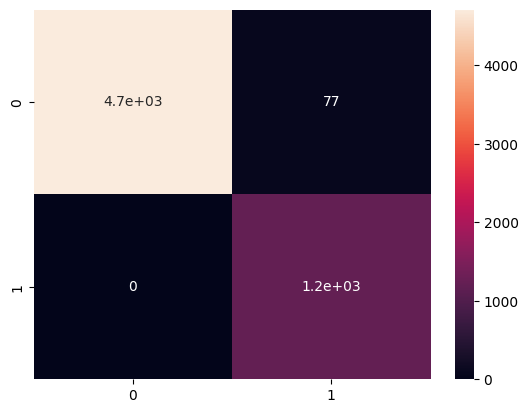

In [ ]:
final_model_evaluation.confusion_matrix()

In [ ]:
final_model_evaluation.classification_report()

'              precision    recall  f1-score   support\n\n        Good       1.00      0.98      0.99      4788\n        Poor       0.94      1.00      0.97      1212\n\n    accuracy                           0.99      6000\n   macro avg       0.97      0.99      0.98      6000\nweighted avg       0.99      0.99      0.99      6000\n'

In [ ]:
final_model_evaluation.cross_validation()

(np.float64(0.9911643280068606), np.float64(0.0018328453200933232))

In [ ]:
final_model_evaluation.accuracy()

0.9871666666666666